- Pearson's correlation coefficient or Pearson's r
- compare 2 continuous variables

In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("exam_scores.csv")
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


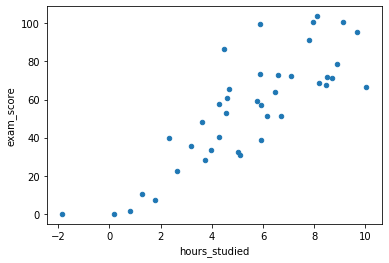

In [3]:
df.plot.scatter(y="exam_score", x="hours_studied")

0. Setup hypoothesis
1. Calculate test stat
2. Find p value from t stat
3. Conclude

- $H_0$: There is no linear relationship between exam score and number of hours studied
- $H_a$: There is a linear relationship between exam score and number of hours studied

In [4]:
x = df.hours_studied
y = df.exam_score

$$
r_{xy} = \frac{\frac{1}{n} \sum(x_i - \bar{x})(y_i - \bar{y})}{s_x s_y}
$$

In [5]:
n = x.shape[0] # must be same for x and y as opposed to T test

r = (
    (((x - x.mean()) * (y - y.mean())).sum() / n)
    /
    (x.std() * y.std())
)

In [6]:
print("n =", n)
print("r =", r)

n = 40
r = 0.8142711078852976


Values closer to one in either direction are close to perfect correlation

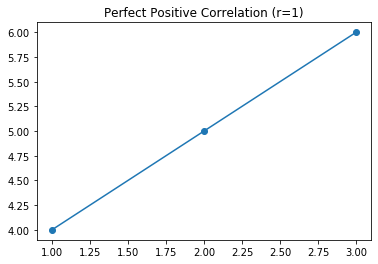

In [7]:
# demonstrated
x = [1, 2, 3]
y = [4, 5, 6]

plt.plot(x, y, marker="o")
plt.title("Perfect Positive Correlation (r=1)")
plt.show()

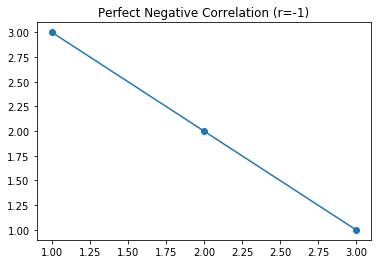

In [8]:
# demonstrated
x = [3, 2, 1]
y = [1, 2, 3]

plt.plot(x, y, marker="o")
plt.title("Perfect Negative Correlation (r=-1)")
plt.show()

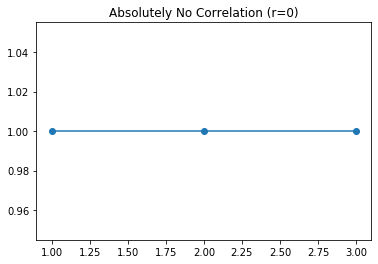

In [9]:
# demonstrated
x = [3, 2, 1]
y = [1, 1, 1]

plt.plot(x, y, marker="o")
plt.title("Absolutely No Correlation (r=0)")
plt.show()

$$ t = \frac{r_{xy}\sqrt{n-2}}{\sqrt{1-r^{2}_{xy}}} $$

In [10]:
x = df.hours_studied
y = df.exam_score

n = x.shape[0] # must be same for x and y as opposed to T test

r = (
    (((x - x.mean()) * (y - y.mean())).sum() / n)
    /
    (x.std() * y.std())
)

t = (
    (r * sqrt(n - 2))
    /
    sqrt(1 - r**2)
)
t

p = stats.t(n - 2).sf(t) * 2
print("t = ", t)
print("p = ", p)

t =  8.647090361086851
p =  1.6485895332680445e-10


In [11]:
print("r =", r)

r = 0.8142711078852976


In [27]:
print(f"""
Because p ({p:.11f}) < alpha (.05), we reject the null hypothesis that there is
no linear relationship between exam score and hours studied.
""")


Because p (0.00000000000) < alpha (.05), we reject the null hypothesis that there is
no linear relationship between exam score and hours studied.



In [28]:
r, p = stats.pearsonr(x, y)
print("r =", r)
print("p =", p)

r = -1.700029006457271e-16
p = 0.9999999999999966


When looking at correlation, keep in mind:

1. Correlation is not causation
2. This is just looking at a linear relationship
3. Correlation itself just looks at two variables, there could be more going on
4. Correlation doesn't tell us how large the relationship is

r =  0.8351498542413307


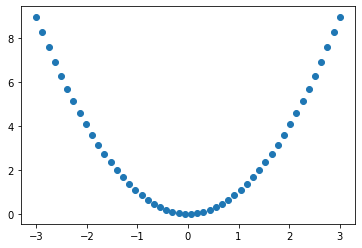

In [14]:
x = np.linspace(-3, 3)
y = x ** 2

r, p == stats.pearsonr(x, y)

plt.scatter(x, y)
print("r = ", r)

r =  -0.9937792168631225


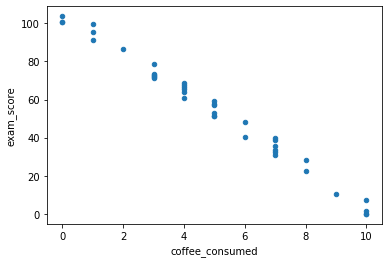

In [21]:
df.plot.scatter(y="exam_score", x="coffee_consumed")

r, p = stats.pearsonr(df.exam_score, df.coffee_consumed)
print("r = ", r)

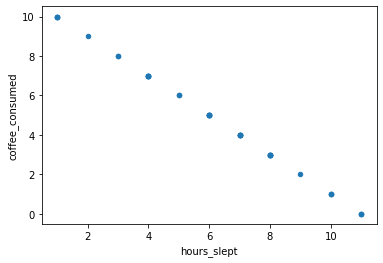

In [19]:
df.plot.scatter(y="coffee_consumed", x="hours_slept")

r = 1.0


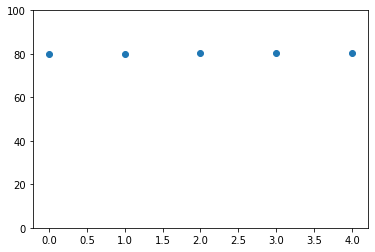

In [26]:
coffee_consumption = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

r, p = stats.pearsonr(coffee_consumption, exam_score)

plt.scatter(coffee_consumption, exam_score)
plt.ylim(0, 100)
print("r =", r)